## 威斯康辛州乳腺癌sklearn数据集拟合

### 1.数据集可视化

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pydot

#过滤掉FutureWarning
import warnings
warnings.filterwarnings('ignore')

#导入数据集以及各种库和模块
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_classification
#导入绘制混淆矩阵工具
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#导入计算平均绝对误差和均方根误差函数
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#数据集拆分
from sklearn.model_selection import train_test_split
#导入随机拆分工具
from sklearn.model_selection import ShuffleSplit
#导入学习曲线库
from sklearn.model_selection import learning_curve
#导入决策树部分
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
#绘制ROC曲线所需库
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [5]:
#导入cancer数据集
cancer = load_breast_cancer() 

#使用pd中的DataFrame结构生成包含特征数据的二维数组
feature = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

#显示数据集的特征表格
print("数据集的大小：{}".format(feature.shape))
feature

数据集的大小：(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


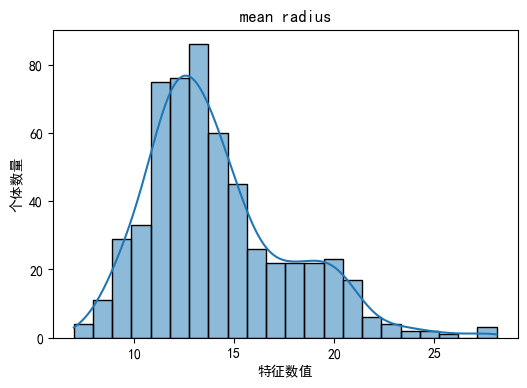

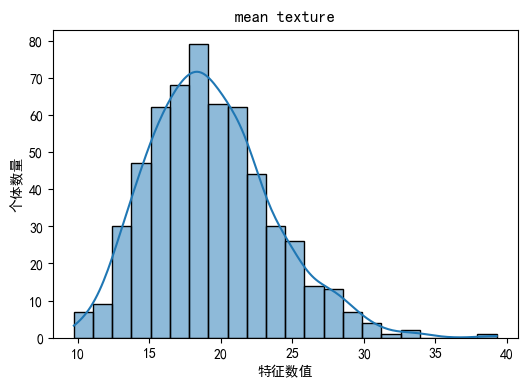

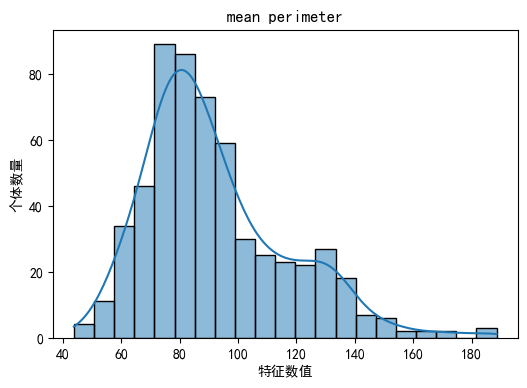

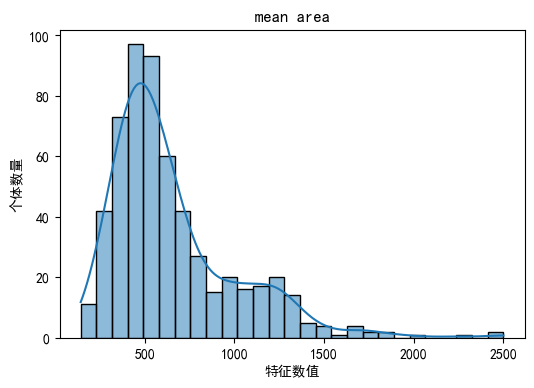

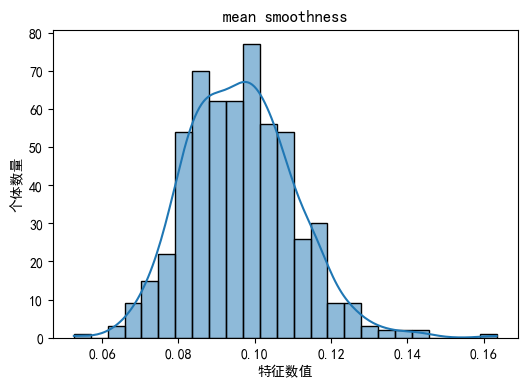

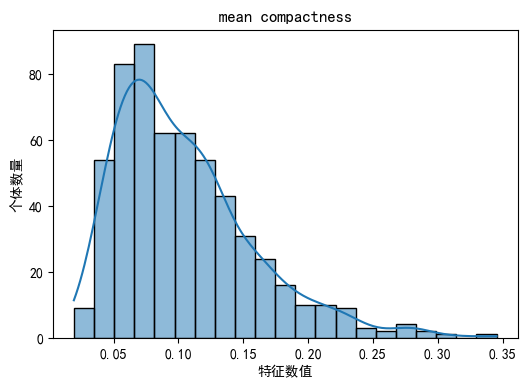

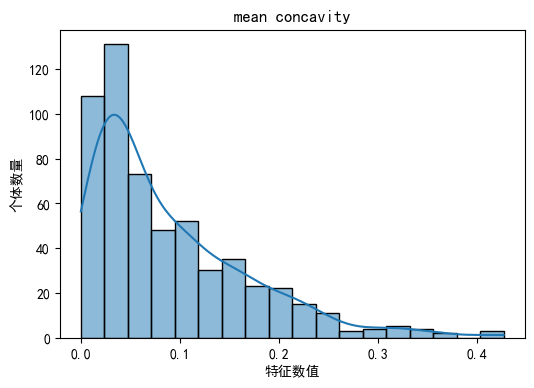

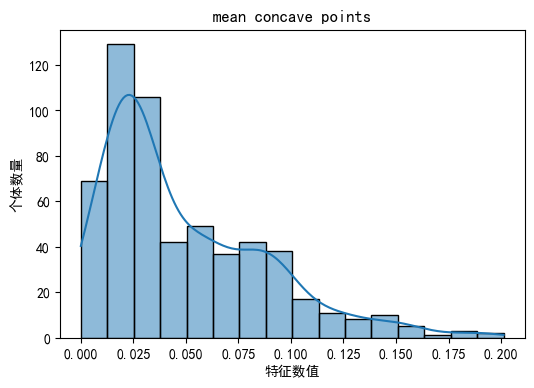

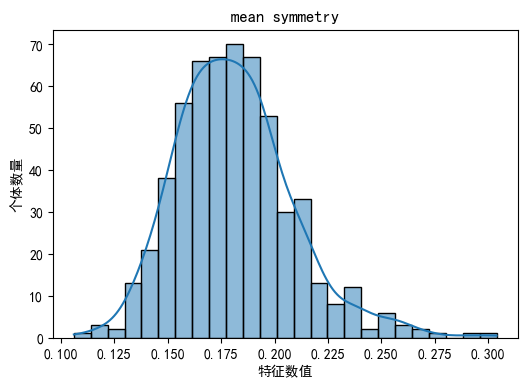

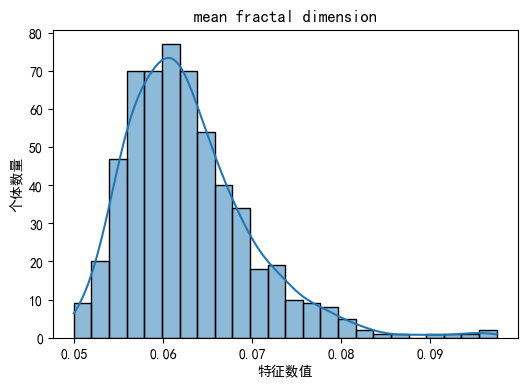

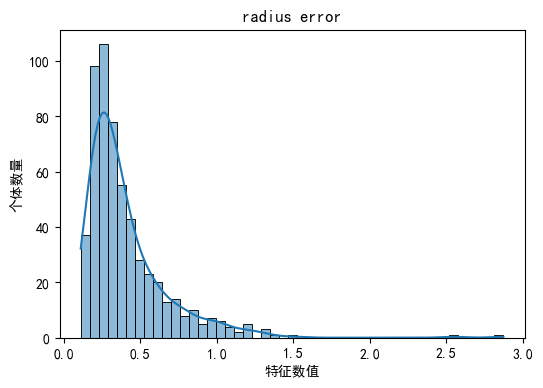

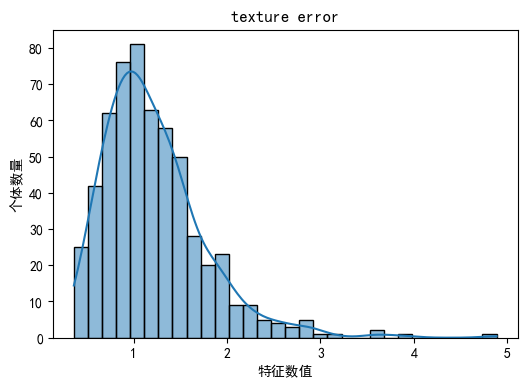

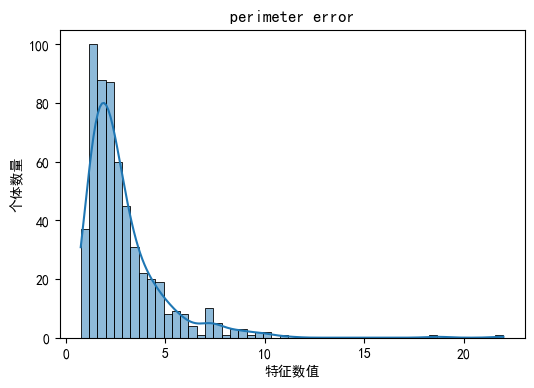

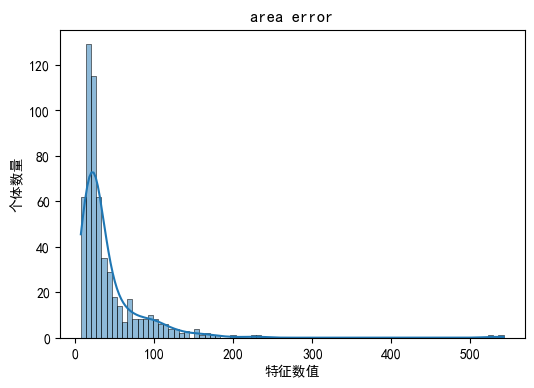

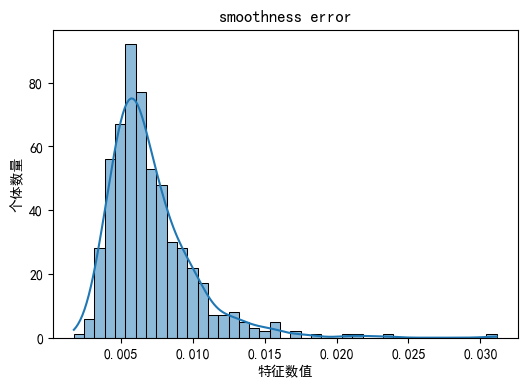

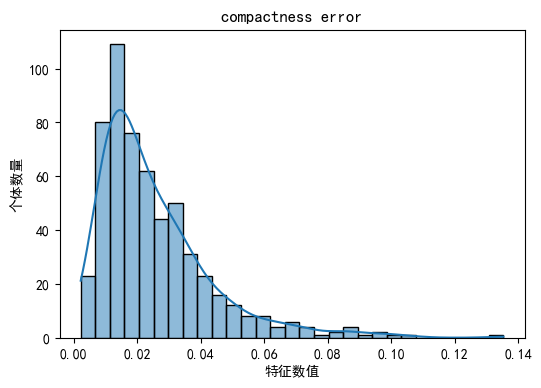

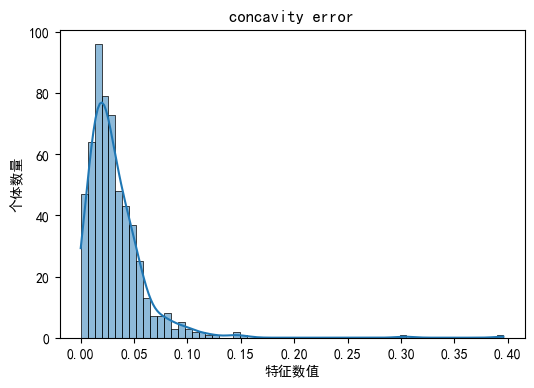

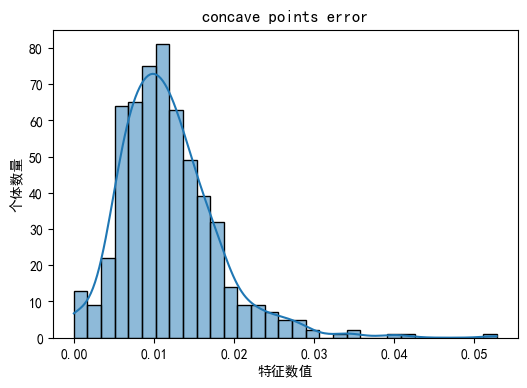

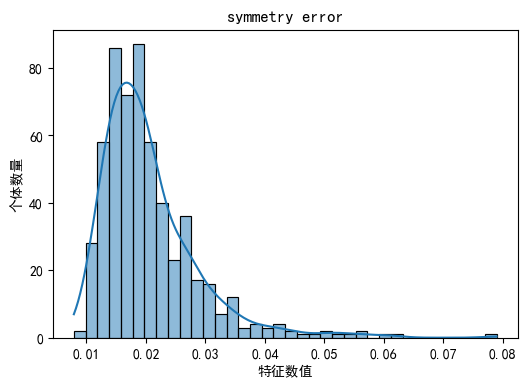

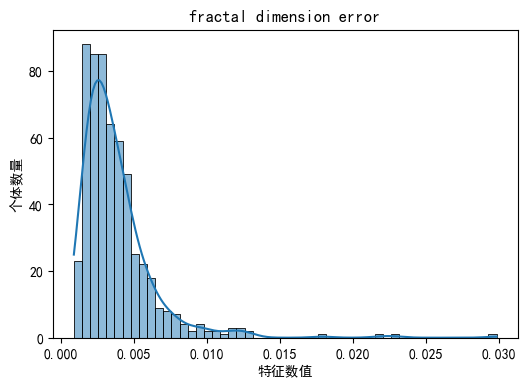

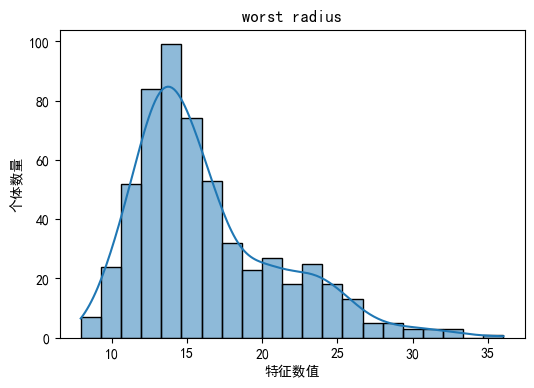

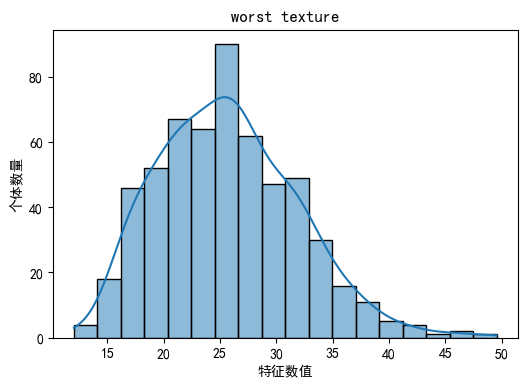

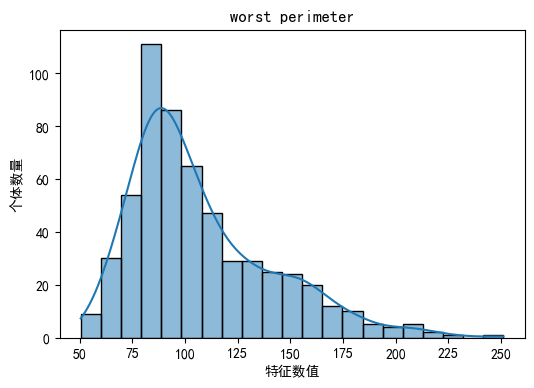

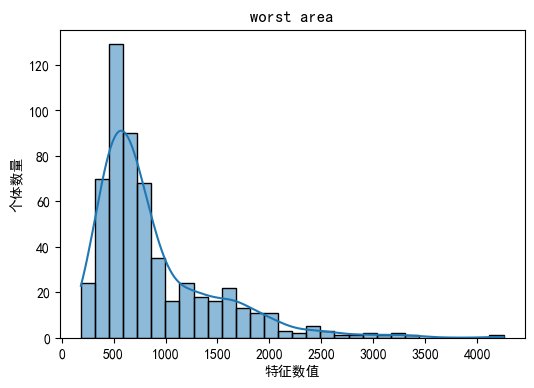

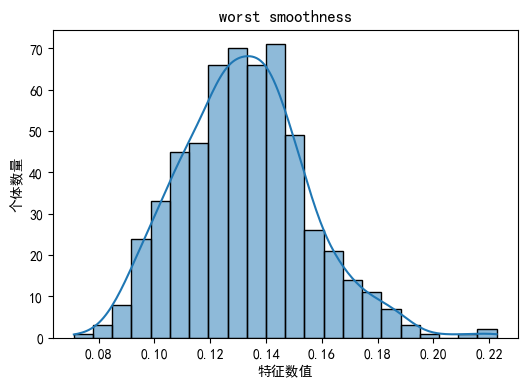

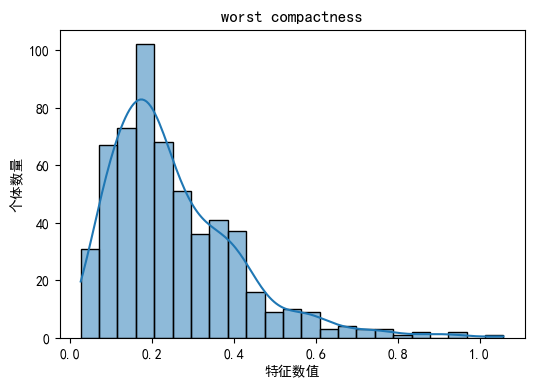

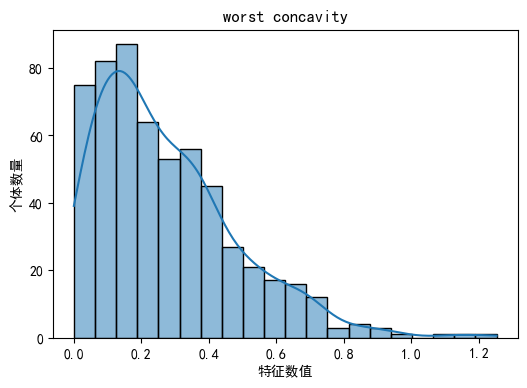

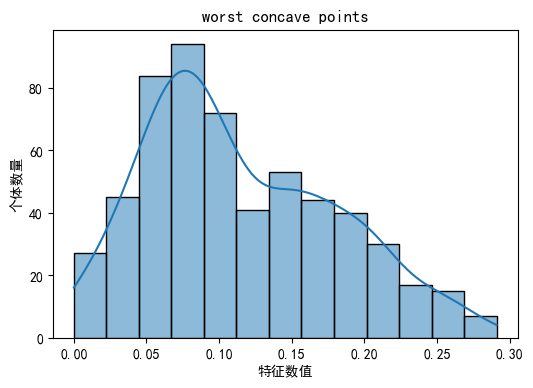

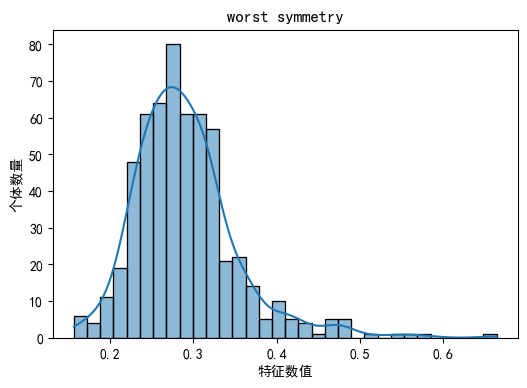

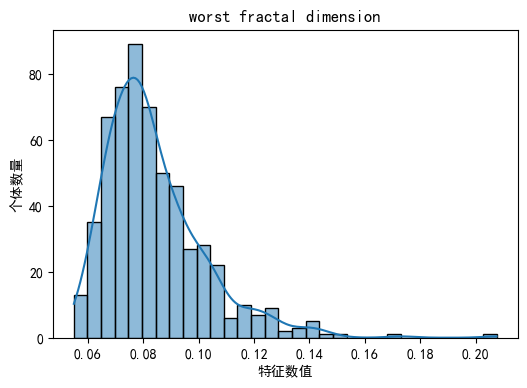

In [6]:
#绘制每个数值属性的直方图
#指明字体参数，实现中文标签
plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体
for i, feature_name in enumerate(feature.columns.values): 
    plt.figure(figsize=(6, 4))
    sns.histplot(feature.iloc[:, i], kde=True)#去掉标签那一列的数据
    plt.xlabel("特征数值")
    plt.ylabel("个体数量")
    plt.title(feature_name)
    plt.show()

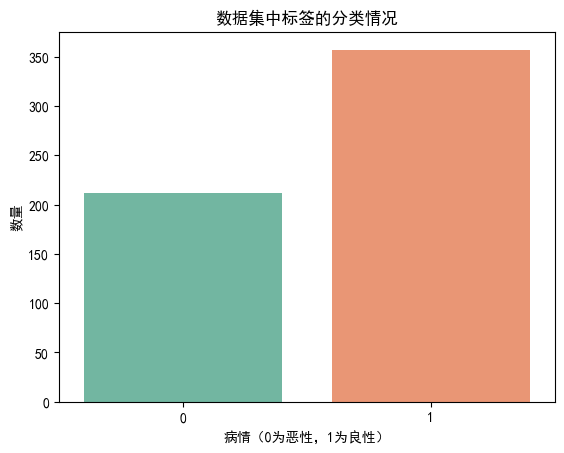

In [7]:
#观察数据集中的标签分类和数量。
plt.rcParams['font.family'] = 'SimHei'  #替换字体
sns.countplot(x = cancer['target'],palette='Set2')#0 恶性， 1 良性
plt.ylabel("数量")
plt.xlabel("病情（0为恶性，1为良性）")
plt.title("数据集中标签的分类情况")
plt.show()

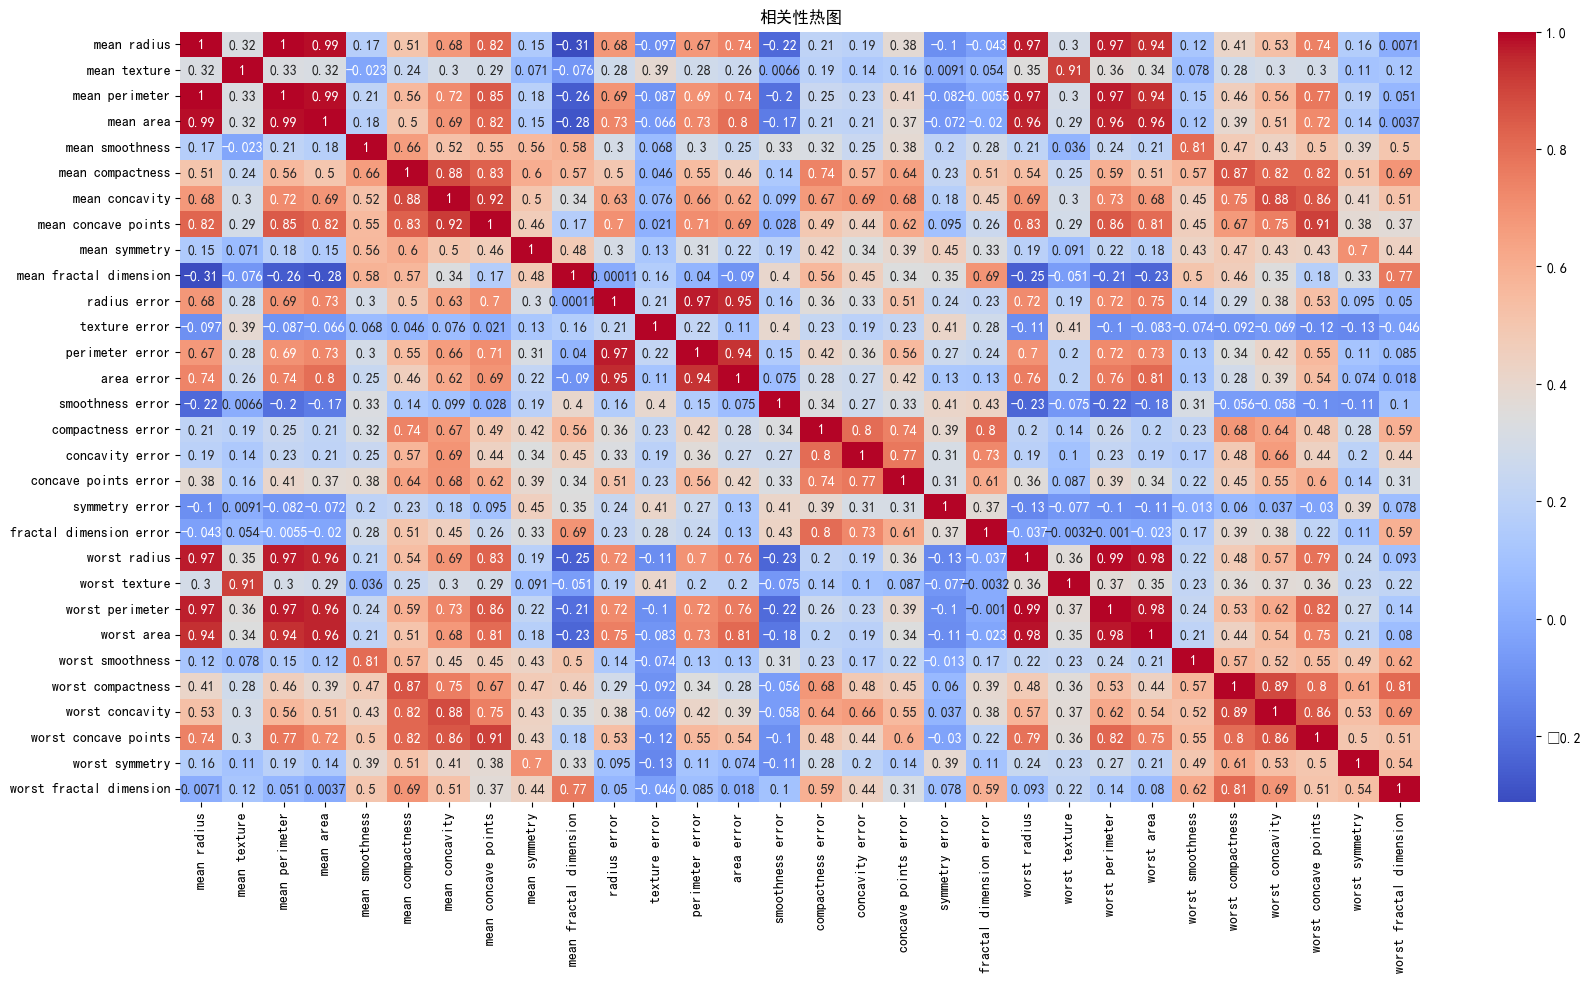

In [8]:
# 可视化相关系数热力图
plt.figure(figsize=(20, 10))
sns.heatmap(feature.corr(), annot=True, cmap="coolwarm")
plt.title("相关性热图")
plt.show()

In [9]:
#热力图中的颜色表示相关性的强度。颜色深，说明两者相关性强，可以剔除两者中的一个变量，从而避免过拟合

### 2.决策树进行拟合

In [115]:
# 划分数据集为训练集和测试集
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

# 打印拆分结果
print("数据集拆分情况：")
print("==========")
print("训练集：{}".format(X_train.shape))
print("测试集：{}".format(X_test.shape))
print("==========")

数据集拆分情况：
训练集：(455, 30)
测试集：(114, 30)


In [116]:
# 创建决策树回归模型
clf = DecisionTreeRegressor(max_depth=4)

# 训练模型
tre = clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)

# 计算平均绝对误差和均方根误差
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 0.06546772336246018
Mean Squared Error: 0.06116603728877655


In [117]:
print("直接拟合的结果：")
print("==========")
print("训练集得分：{:.4f}".format(tre.score(X_train, y_train)))
print("测试集得分：{:.4f}".format(tre.score(X_test, y_test)))
print("==========")

直接拟合的结果：
训练集得分：0.9813
测试集得分：0.7396


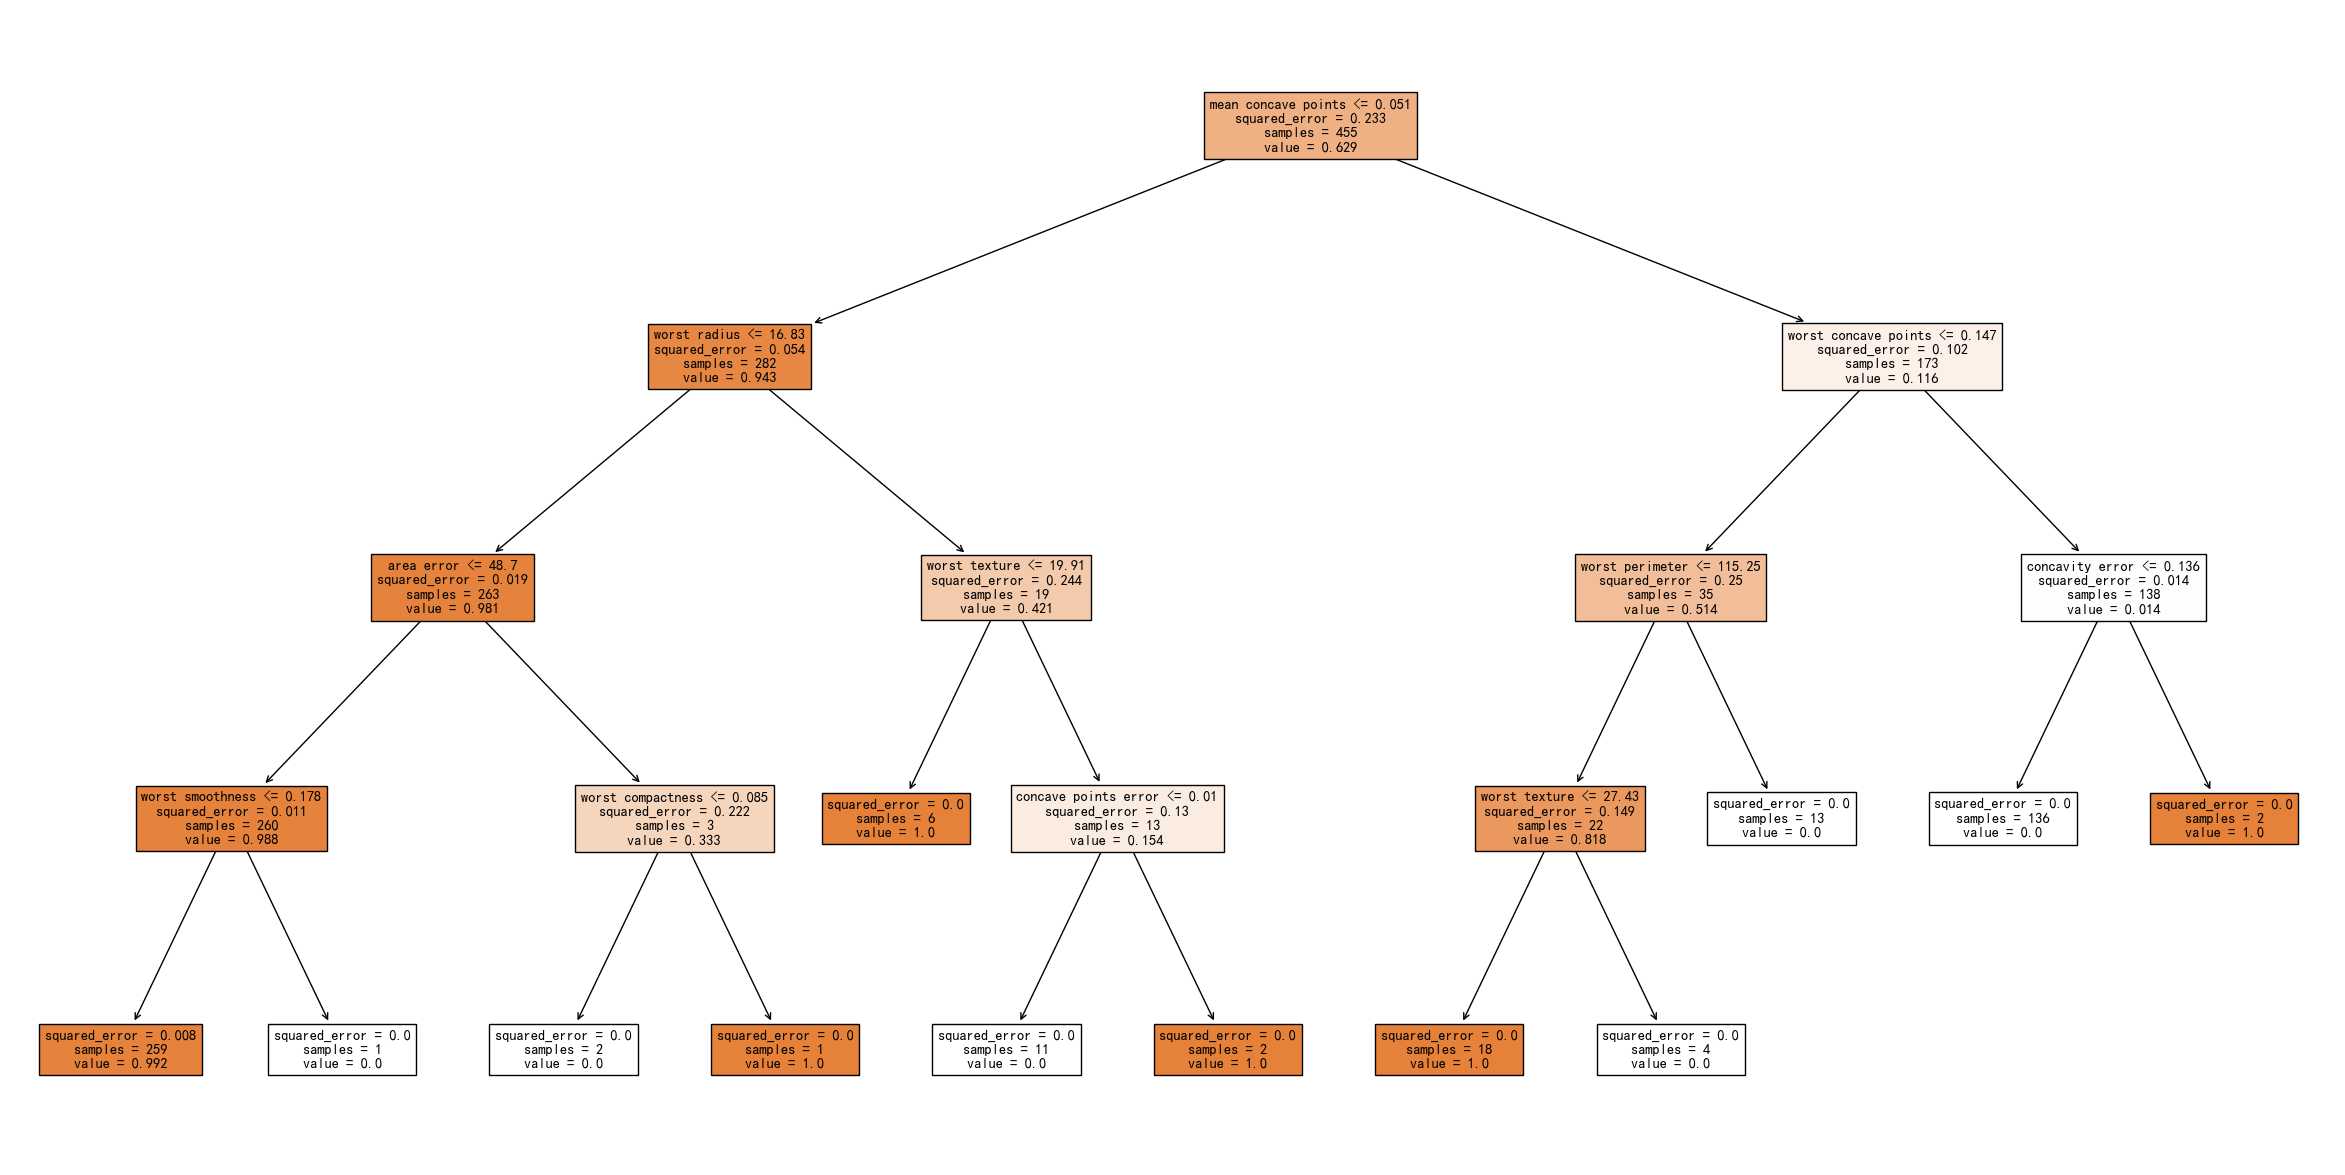

In [118]:
# 指定图幅大小
plt.figure(figsize=(30,15))

# 绘制图像
tree.plot_tree(clf,filled = True,feature_names=cancer.feature_names)
plt.show()

# 保存图像
#plt.savefig('./tree.jpg')

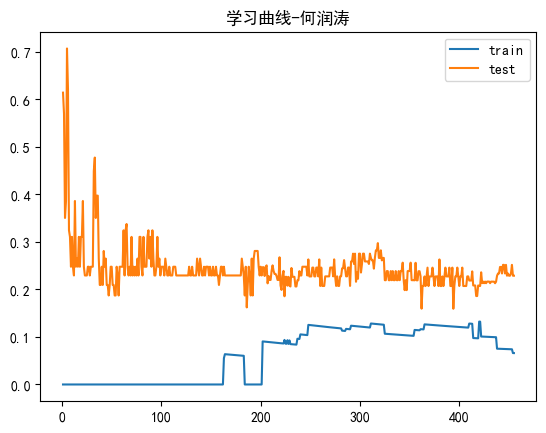

In [119]:
#基于RMSE绘制学习曲线
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
plt.rcParams['font.family'] = 'SimHei'

def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_scores = []
    test_scores = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])

        y_train_predict = algo.predict(X_train[:i])
        train_scores.append(mean_squared_error(y_train[:i], y_train_predict))

        y_test_predict = algo.predict(X_test)
        test_scores.append(mean_squared_error(y_test, y_test_predict))

    plt.plot([i for i in range(1, len(X_train)+1)],
             np.sqrt(train_scores), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)],
             np.sqrt(test_scores), label="test")
    plt.title("学习曲线-何润涛")
    plt.legend()
    plt.show()

plot_learning_curve(clf,X_train, X_test, y_train, y_test)

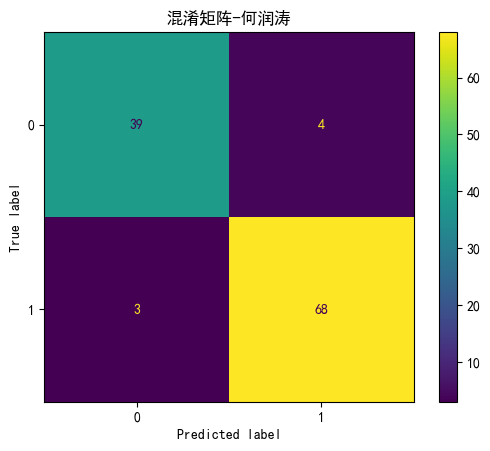

In [120]:
#绘制混淆矩阵
from sklearn.metrics import ConfusionMatrixDisplay

#返回值y_pred内有大量小数，将其整数化
yy_pred=list(y_pred)
for i in range(114):
    if y_pred[i]>0.9:
        yy_pred[i]=1

cm = confusion_matrix(y_test, yy_pred) 
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体
plt.title("混淆矩阵-何润涛")
plt.show()

### 3.绘制ROC曲线

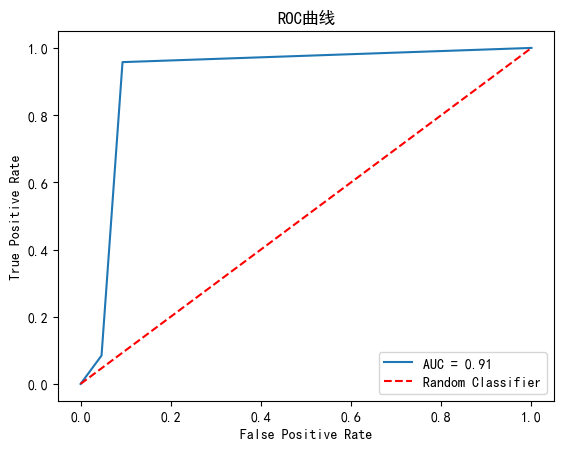

In [121]:

plt.rcParams['font.family'] = 'SimHei'
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')  # 绘制ROC曲线，标注AUC的值
# 随即分类器没有分类能力，其FPR=TPR。随机分类器的性能通常表示为ROC曲线上的对角线
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')  # 绘制随机分类器的ROC曲线
plt.xlabel('False Positive Rate')  # x轴标签为FPR
plt.ylabel('True Positive Rate')   # y轴标签为TPR
plt.title('ROC曲线')             # 设置标题
plt.legend()                    
plt.show() 